In [216]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

In [217]:
data = fetch_california_housing()

In [218]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [219]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


# Data Exploration

In [220]:
df.dtypes


MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [221]:
df.isna().any()


MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool

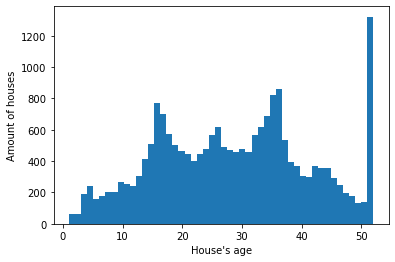

In [222]:
df.HouseAge.plot(kind='hist', bins=50)
plt.xlabel("House's age")
plt.ylabel("Amount of houses")
plt.show()

# Data Preparation

In [223]:
for column in df.columns:
    df[column] = df[column] / max(df[column]) # Normalizing the data.
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.555010,0.788462,0.049216,0.030053,0.009024,0.002055,0.902980,1.069285
1,0.553423,0.403846,0.043959,0.028529,0.067289,0.001697,0.902503,1.069198
2,0.483823,1.000000,0.058405,0.031510,0.013901,0.002254,0.902265,1.069373
3,0.376204,1.000000,0.040994,0.031499,0.015638,0.002049,0.902265,1.069460
4,0.256412,1.000000,0.044267,0.031734,0.015834,0.001755,0.902265,1.069460


In [224]:
X = df.drop("MedInc", axis=1)
y = df.MedInc

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Models


### SVR

In [226]:
svr = SVR(kernel="poly", C=300, degree=5)
svr.fit(X_train, y_train)

SVR(C=300, degree=5, kernel='poly')

In [227]:
svr.score(X_test, y_test)

0.6843203972867686

### RandomForestClassifier

In [228]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [229]:
rfc.score(X_test, y_test)

0.7801077990662313

### Ridge

In [230]:
ridge = Ridge(alpha=0)
ridge.fit(X_train, y_train)

Ridge(alpha=0)

In [231]:
ridge.score(X_test, y_test)



0.6079670353807558